In [63]:
import geopandas as gpd # Library for dealing with geospatial data  
import matplotlib.pyplot as plt # Library for visualization the data 
import matplotlib.cm as cm  # Import the colormap module from matplotlib



# Loading the variables  (GeoDataFrame)

In [64]:
cities=gpd.read_file(r'donneesTP1\donneesTP1\cities.shp')
counties=gpd.read_file(r'donneesTP1\donneesTP1\counties.shp')
rivers=gpd.read_file(r'donneesTP1\donneesTP1\us_rivers.shp')
lakes=gpd.read_file(r'donneesTP1\donneesTP1\us_lakes.shp')
states=gpd.read_file(r'donneesTP1\donneesTP1\states.shp')
highways=gpd.read_file(r'donneesTP1\donneesTP1\intrstat.shp')

# 1- Extract the geographic entities {CITIES, RIVERS,HIGHWAYS} of main land America

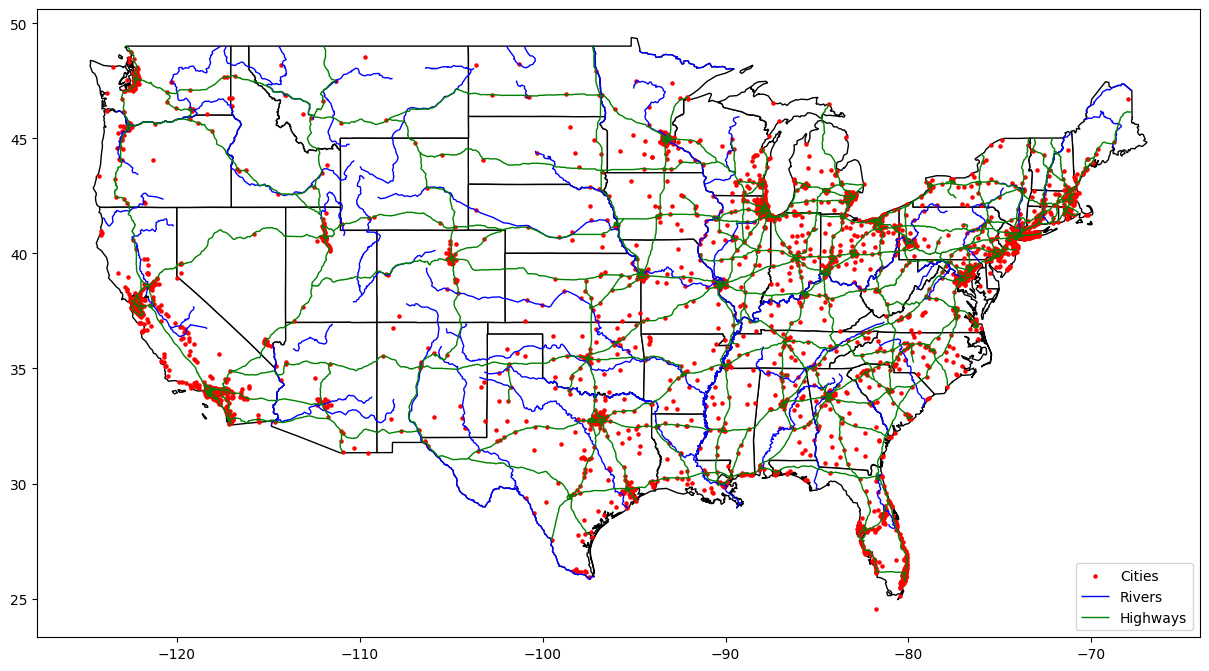

In [65]:

fig, ax = plt.subplots(figsize=(15, 15))
# Filter out Alaska and Hawaii from the states GeoDataFrame
continental_states = states[~states['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Filter out the rivers of Alaska and Hawaii from the rivers GeoDataFrame by their Index 
excluded_river_indices = [39, 40, 41, 42, 43, 44, 45] #List with index of the rivers 
continental_rivers = rivers[~rivers.index.isin(excluded_river_indices)]

# Filter out cities from  Alaska and Hawaii from the cities GeoDataFrame
continental_cities= cities[~cities['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Filter out highways from Alaska and Hawaii from the highways GeoDataFrame
excluded_highways= highways[~highways['ROUTE_NUM'].isin(['IA4', 'IH1','IH2','IH3','IH201'])]#List of the highways ROUTE_NUM

#visualizing the data after the filtration  
base = continental_states.plot(ax=ax, color='white', edgecolor='black') #Creating the Base Map
continental_cities.plot(ax=base, marker='o', color='red', markersize=5, label='Cities')#city plot 
continental_rivers.plot(ax=base, color='blue', linewidth=1, label='Rivers')#river plot
excluded_highways.plot(ax=base, color='green', linewidth=1, label='Highways')#highway plot

plt.legend(loc='lower right')

plt.show()


In [66]:
continental_states.head(4) # shows first 4 rows of the Geodataframe

,AREA,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POP1990,POP2000,POP90_SQMI,Shape_Leng,Shape_Area,geometry
1,67290.061,Washington,53,Pacific,WA,4866692.0,5835089.0,72,34.956856,20.750758,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,147244.653,Montana,30,Mtn,MT,799065.0,885795.0,5,34.528066,45.134302,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,32161.925,Maine,23,N Eng,ME,1227928.0,1257219.0,38,18.898720,9.570698,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,70812.056,North Dakota,38,W N Cen,ND,638800.0,631032.0,9,21.353307,21.874874,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


# Creating the shapefile of each American State

In [67]:
import os #Library to interact the operating system 
# Create a folder to store the individual state shapefiles
output_folder = 'state_shapefiles'
os.makedirs(output_folder, exist_ok=True)

# Iterate over each state
for state_name in continental_states['STATE_NAME']:
    # Filter the data for the current state
    state_data = continental_states[continental_states['STATE_NAME'] == state_name]
    
    # Save the filtered data as a shapefile
    output_filename = os.path.join(output_folder, f'{state_name}.shp')
    state_data.to_file(output_filename)


C:\Users\sayeh omar\AppData\Local\Temp\ipykernel_6308\932598477.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_states)


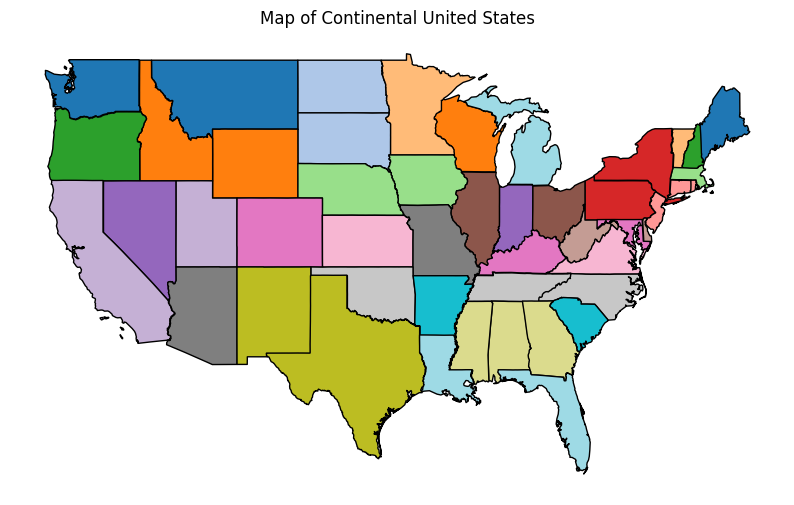

In [68]:
# Exclude Alaska and Hawaii
continental_states = states[~states['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Get the number of continental states
num_states = len(continental_states)

# Define a categorical colormap with enough colors for each state
cmap = plt.cm.get_cmap('tab20', num_states)

# Plot each state with a different color
fig, ax = plt.subplots(figsize=(10, 8))
for i, state in enumerate(continental_states['STATE_NAME']):
    continental_states[continental_states['STATE_NAME'] == state].plot(ax=ax, color=cmap(i), edgecolor='black')

ax.set_title('Map of Continental United States')
plt.axis('off')
plt.show()

# Calculate the demographic density for the American states

In [69]:
continental_states['Population_Density']=continental_states['POP2000']/continental_states['Shape_Area'] 

c:\Users\sayeh omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [70]:
# Find the minimum and maximum values of the 'Population_Density' column
min_density = continental_states['Population_Density'].min()
max_density = continental_states['Population_Density'].max()

# Print the minimum and maximum values
print("Minimum Population Density:", min_density)
print("Maximum Population Density:", max_density)


Minimum Population Density: 17151.583883178577
Maximum Population Density: 28903942.65612988


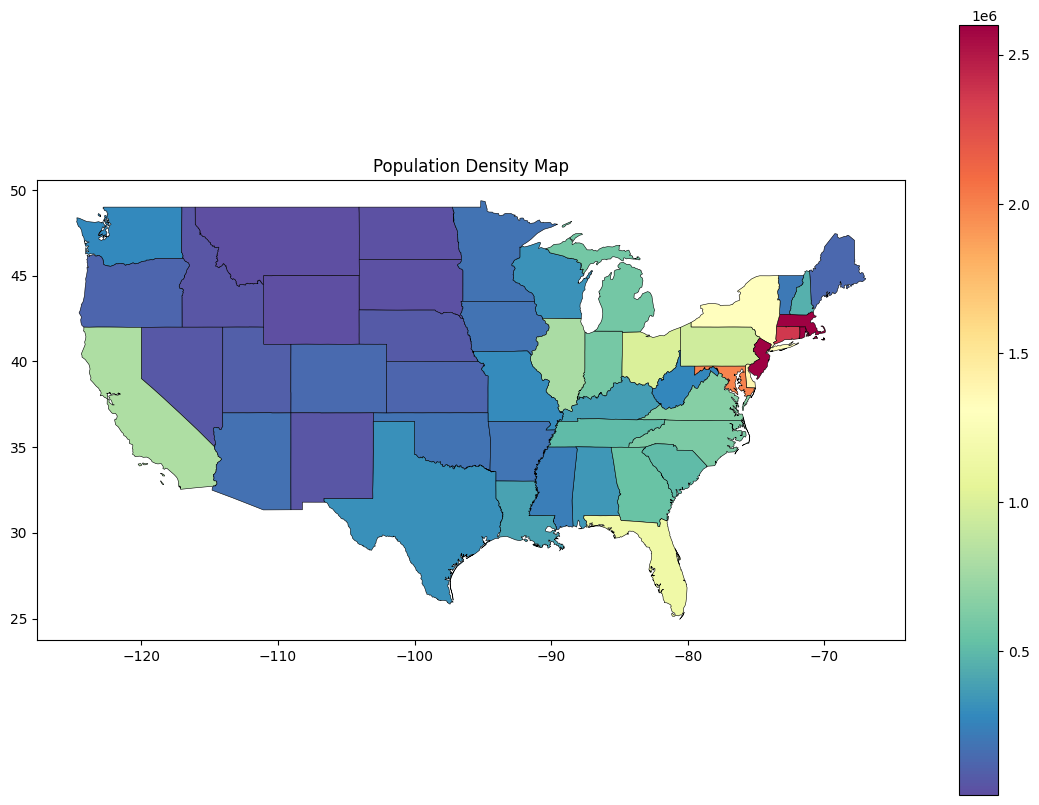

In [71]:

# Plot the map with population density, specifying vmin and vmax
fig, ax = plt.subplots(figsize=(14, 10))
continental_states.plot(column='Population_Density', cmap='Spectral_r', ax=ax, legend=True,edgecolor='black', linewidth=0.4,vmax=2600000)
ax.set_title('Population Density Map')
plt.show()


# Visualizing the Population density as a class based system 

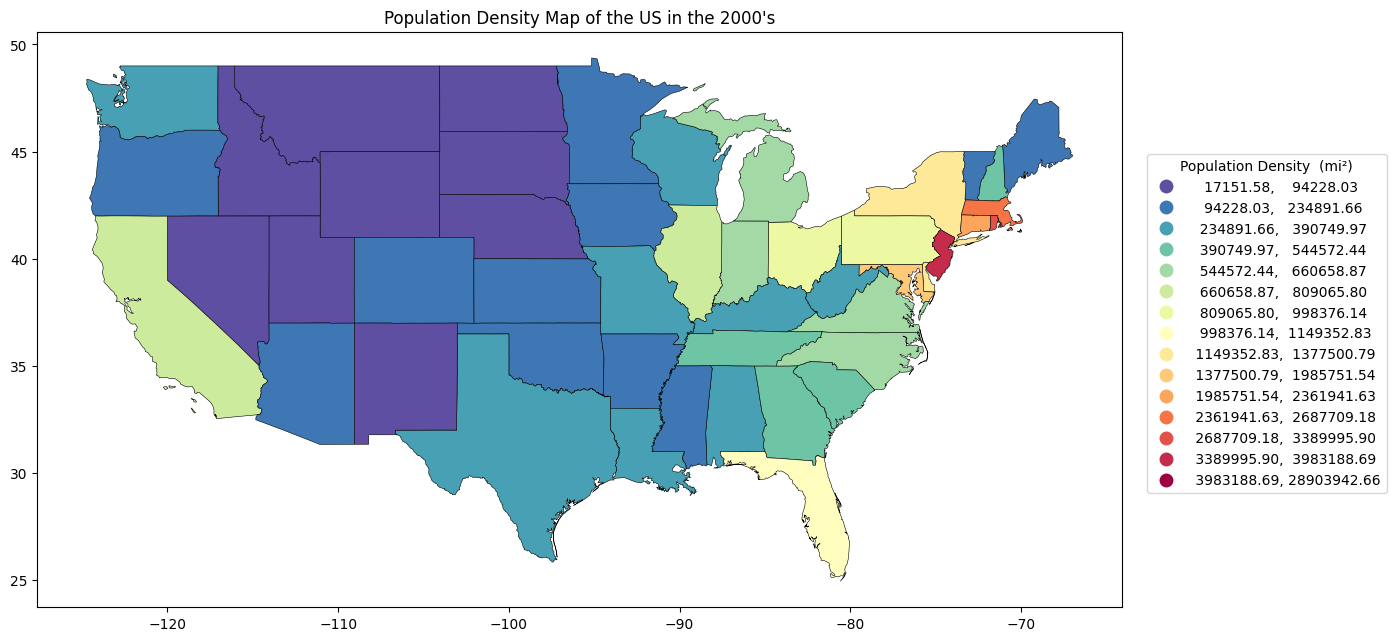

In [72]:

# Create a copy of the GeoDataFrame to avoid SettingWithCopyWarning
continental_states = continental_states.copy()
fig, ax = plt.subplots(figsize=(14, 10))


# Plot the map with population density in a choropleth format
continental_states.plot(column='Population_Density', cmap='Spectral_r', ax=ax, edgecolor='black', linewidth=0.4,legend=True, scheme='NaturalBreaks', k=15)
# Customize legend position and style
legend = ax.get_legend()
legend.set_title('Population Density  (mi²)')
legend.set_bbox_to_anchor((1.25, 0.8))  # Set legend position
legend.set_frame_on(True)  # Show legend frame


ax.set_title("Population Density Map of the US in the 2000's")
plt.show()


# Interactive map of the population density based on city (heatmap )

In [73]:
from folium import plugins
import folium


# Create a Folium map centered on the US
map = folium.Map(location=[37.0902, -95.7129], tiles="OpenStreetMap", zoom_start=4.2)

# Add heatmap layer to the map using population data
heat_data = [[point.y, point.x, pop] for point, pop in zip(cities.geometry, cities['POP1990'])]
folium.plugins.HeatMap(heat_data).add_to(map)
map

In [74]:
# Save the map to an HTML file
map.save('population_heatmap.html')

#  Extract the intersection points between highways and rivers

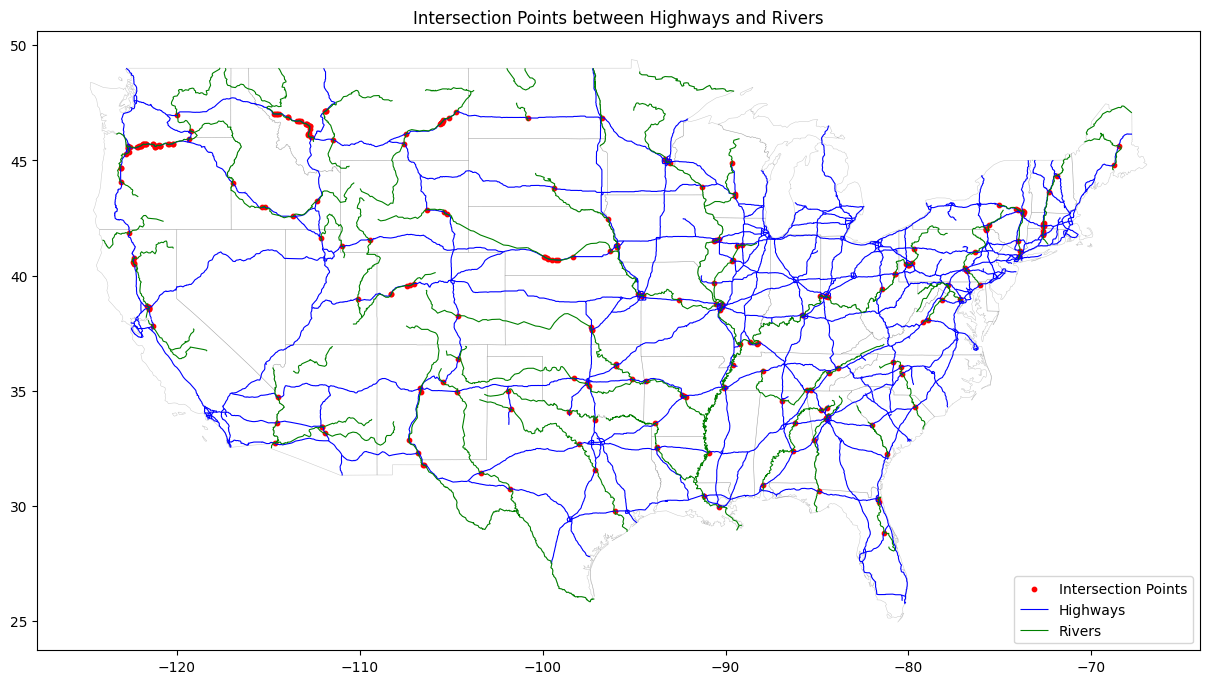

In [75]:
# Find the intersection points between highways and rivers
intersection_points = highways.unary_union.intersection(rivers.unary_union)

# Convert the intersection points to a GeoDataFrame
intersection_gdf = gpd.GeoDataFrame(geometry=[intersection_points])

# Plot the intersection points
fig, ax = plt.subplots(figsize=(15, 10))
base = continental_states.plot(ax=ax, color='white', edgecolor='black',alpha=0.2,linewidth=0.4)

intersection_gdf.plot(ax=ax, color='red', markersize=10, label='Intersection Points', marker='o')

excluded_highways.plot(ax=ax, color='blue', label='Highways',linewidth=0.8)
continental_rivers.plot(ax=ax, color='green', label='Rivers',linewidth=0.8)
plt.title('Intersection Points between Highways and Rivers')
# Move the legend to the top-right corner
plt.legend(loc='lower right')

plt.show()

In [76]:
cities.sample(2)


,CITY_FIPS,CITY_NAME,STATE_FIPS,STATE_NAME,STATE_CITY,TYPE,CAPITAL,ELEVATION,POP1990,geometry
1778,53550,Ottawa,20,Kansas,2053550,city,N,901,10667,POINT (-95.26653 38.60914)
1918,11320,Cedar City,49,Utah,4911320,city,N,5834,13443,POINT (-113.07428 37.68973)


# Determine the cities Chicago and Alabama

C:\Users\sayeh omar\AppData\Local\Temp\ipykernel_6308\3325400328.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = axs[1].get_legend_handles_labels()  # Get handles and labels


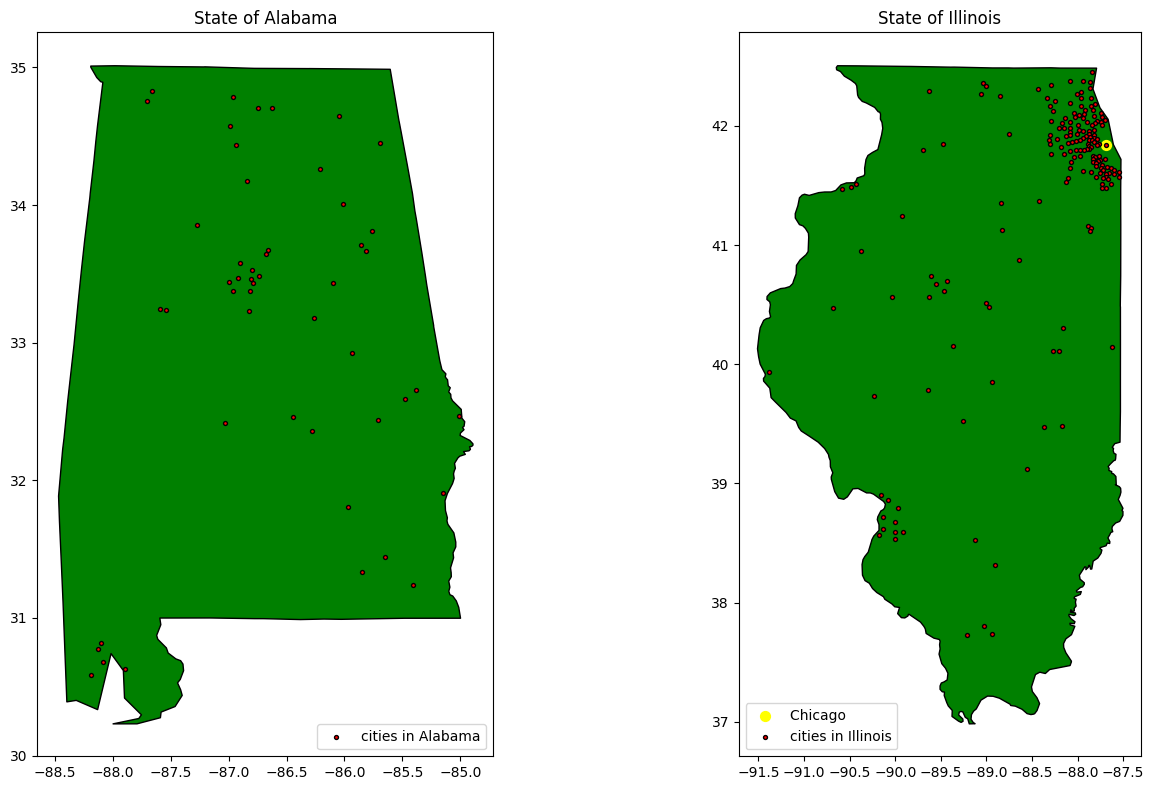

In [77]:
# Filter the geometries for Alabama, Illinois, and Chicago
alabama = continental_states[continental_states['STATE_NAME'] == 'Alabama']
illinois = continental_states[continental_states['STATE_NAME'] == 'Illinois']
cities_Alabama = cities[cities['STATE_NAME'] == 'Alabama']
Chicago = cities[cities['CITY_NAME'] == 'Chicago']
cities_Illinois = cities[cities['STATE_NAME'] == 'Illinois']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot Alabama in the first subplot
alabama.plot(ax=axs[0], color='green', edgecolor='black')
cities_Alabama.plot(ax=axs[0], color='red', edgecolor='black', markersize=8, label='cities in Alabama')  
axs[0].set_title('State of Alabama')

# Plot Illinois in the second subplot
illinois.plot(ax=axs[1], color='green', edgecolor='black', label='Illinois')  
Chicago.plot(ax=axs[1], color='Yellow', edgecolor='Yellow', markersize=50, label='Chicago ')  
cities_Illinois.plot(ax=axs[1], color='red', edgecolor='black', markersize=8, label='cities in Illinois')  

axs[1].set_title('State of Illinois')

# Add legend
handles, labels = axs[1].get_legend_handles_labels()  # Get handles and labels
axs[1].legend(handles, labels, loc='lower left')  # Add legend to the second subplot
handles, labels = axs[0].get_legend_handles_labels()  # Get handles and labels
axs[0].legend(handles, labels, loc='lower right')  # Add legend to the second subplot
# Display the plot

plt.tight_layout()
plt.show()




# Cities whose population is equal or bigger 60 thousand inhabitants

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


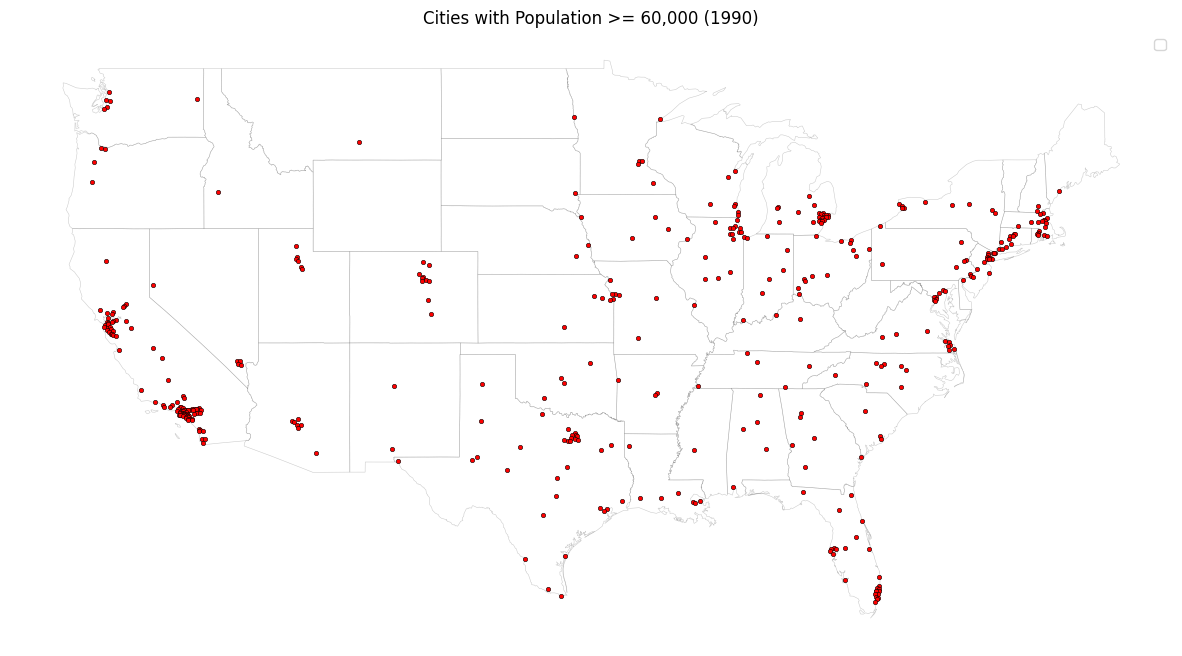

In [78]:
# Filter cities with population greater than or equal to 60,000
cities_filtered = cities[cities['POP1990'] >= 60000]
cities_filtered=cities_filtered[~cities_filtered['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Plot the filtered cities
fig, ax = plt.subplots(figsize=(15, 10))
base = continental_states.plot(ax=ax, color='white', edgecolor='black',alpha=0.2,linewidth=0.4)

cities_filtered.plot(ax=ax, color='red',edgecolor='black', linewidth=0.4, markersize=10)   # Plot filtered cities with >=60,000 population
ax.set_title('Cities with Population >= 60,000 (1990)')
plt.axis('off')
plt.legend()
plt.show()

In [79]:


# Filter cities with population greater than or equal to 60,000
cities_filtered = cities[cities['POP1990'] >= 60000]
cities_filtered=cities_filtered[~cities_filtered['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Create a map centered at the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Define custom marker icon
custom_icon = folium.Icon(icon='cloud', color='blue', prefix='fa')  # Example custom icon using Font Awesome

# Add markers for filtered cities to the map
for idx, city in cities_filtered.iterrows():
    # Extracting the coordinates from the geometry column
    lat, lon = city['geometry'].y, city['geometry'].x
    folium.Marker([lat, lon], popup=city['CITY_NAME']).add_to(m)

# Display the map
m
